<div style="background-color: lightblue; padding: 30px;">
    
# Digital House - Data Science a Distancia

## Proyecto Final Integrador

### Autores: Daniel Borrino, Ivan Mongi, Jessica Polakoff, Julio Tentor
    
<p style="text-align:right;">Agosto 2022</p>

---
</div>    

---
## Objetivo del Trabajo Final Integrador

<h4 style="text-align:center;">Demostrar que aprendimos conceptos y desarrollamos habilidades para obtener un modelo de aprendizaje automático que razonablemente predice un valor</h4>

### Escenario

Trabajamos como científicos de datos para una compañía; para consolidar nuestra posición presentamos el prototipo de un producto / servicio que permita transformar organizaciones al modelo Data-Driven Organization

### Requisitos del Trabajo Final Integrador

- Utilizar modelos de regresión o clasificación (es opcional)
- Evaluar modelos mediante ensemble, bagging o boosting
- Realizar selección de hiperparámetros
- Implementar pipeline al menos con algunos pasos del preprocesamiento
- Analizar importancia de características
- Serializar el modelo con mejor desempeño

### Entregables del Trabajo Final Integrador
#### Técnico (Jupyter Notebook)

1. Introducción y planteo del problema
2. Técnicas a utilizar y detalle del conjunto de datos
3. Desarrollo del análisis, visualizaciones, resultados de modelos
4. Detalle de hallazgos, conclusiones y recomendaciones

#### Presentación (audiencia NO TÉCNICA)

1. Resumen del problema
2. Métodos utilizados
3. Principales resultados

### Aspectos técnicos

La notebook se ejecuta correctamente en una instalación estándar de Anaconda versión *4.13.0 build  3.21.6, Python 3.9.7*

También hacen falta las siguientes librerías:

- [XGBoost](https://xgboost.readthedocs.io/en/stable/install.html)

---

---
<a id="Content"></a>
## Contenido

<div>
<dl style="display:block; margin-top:1em; margin-bottom:1em; margin-left:2em; margin-right:0;">
    <dt>1. Introducción y planteo del problema</dt>
    <dd>1.1. asdfasdf</dd>
    <dd>1.2. asdfad</dd>
    <dd><br/></dd>
    <dt>2. Técnicas a utilizar y detalle del conjunto de datos</dt>
    <dd><a href="#TechniquesDescription_1">2.1. Técnicas utilizadas</a></dd>
    <dd><a href="#DatasetDescription_1">2.2. Descripción de los datos</a></dd>
    <dd><br/></dd>
    <dt>3. Desarrollo del análisis, visualizaciones, resultados de modelos</dt>
    <dd><a href="#ExploratoryDataAnalysis_3_1">3.1. Correlaciones entre datos básicos</a></dd>
    <dd><a href="#ExploratoryDataAnalysis_3_2">3.2. Correlaciones con palabras frecuentes y días de publicación</a></dd>
    <dd><a href="#ExploratoryDataAnalysis_3_3">3.3. Relación de la cantidad de comentarios obtenidos según conteo de publicaciones</a></dd>
    <dd><a href="#ProofOfConcept_3_4">3.4. Prueba de concepto para modelos de regresión</a></dd>
    <dd><a href="#GridSearch_Evaluate_3_5">3.5. Evaluación de hiper parámetros</a></dd>
    <dd><br/></dd>
    <dt>4. Detalle de hallazgos, conclusiones y recomendaciones</dt>
    <dd>4.1. </dd>
    <dd>4.2. </dd>
</dl>
<br/>
</div>

---

---

---
<a id="NecessaryLibraries"></a>
#### Librerías Necesarias


In [2]:
# imprescindible
import pandas as pd
import numpy as np

# to avoid some warnings messages
import warnings
warnings.filterwarnings('ignore')

# to draw some graphs
import seaborn as sns
import matplotlib.pyplot as plt

# set seaborn and matplotlib default theme
sns.set_theme()
_sns_plotting_contex_ = sns.plotting_context()
sns.plotting_context('poster')

# set seaborn and matplotlib style to ...
# plt.style.use('classic')
sns.mpl.rcParams['axes.titlesize'] = 18
sns.mpl.rcParams['axes.labelsize'] = 14

# to use HTML codes within IPpython.display function
from IPython.display import HTML

# to keep only 4 digits
ROUND = lambda v : round(v, 4)

# to interact with operating system
import os
import time

# to scale data
from sklearn.preprocessing import StandardScaler

# to use in proof of concept for regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# to evaluate models
from sklearn.metrics import mean_squared_error

# to tune hiperparameters
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV



---
<a id="UsefulFunctions"></a>
#### Funciones útiles


In [3]:
def read_blogData_train() :
    u''' Reads and prepare data from blog feedback data train set
    
    '''

    data = pd.read_csv("./data/blogData_train.csv", header=None)
    data.drop_duplicates(inplace=True)
    data.reset_index(drop=True, inplace=True)
    
    header = pd.read_csv("./data/blogData_label.csv", header=None)
    header = list(header[0])
    
    if len(header) != data.shape[1] :
        raise Exception('Los encabezados y la cantidad de características NO COINCIDE !!!')

    data.columns = header
    
    return data


In [4]:

def read_blogData_test() :
    u''' Reads and prepare data from blog feedback data test set
    
    '''

    filepath = './data/test/'
    filelist = [os.path.join(filepath, filename) for filename in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, filename))]

    data_test_raw = pd.DataFrame()

    for filename in filelist :
        data_temp_raw = pd.read_csv(filename, header=None)
        data_temp_raw.drop_duplicates(inplace=True)
        data_test_raw = data_test_raw.append(data_temp_raw)

    return data_test_raw

In [5]:
def get_blogData_features(data) :
    u''' Create a dictionary with some keys associates to list of features in the final work dataframe
    
    args:
        data : DataFrame
    
    return:
        dictionary with util features names
    
    '''
    columns = list(data.columns)

    features = dict()

    features['sd_nc_total_before_BT'] = columns[0:5]
    features['sd_nc_24_before_BT'] = columns[5:10]
    features['sd_nc_between_24_48'] = columns[10:15]
    features['sd_nc_first_24_BT'] = columns[15:20]
    features['sd_nc_diff_24_48'] = columns[20:25]
    
    features['sd_nl_total_before_BT'] = columns[25:30]
    features['sd_nl_24_before_BT'] = columns[30:35]
    features['sd_nl_between_24_48'] = columns[35:40]
    features['sd_nl_first_24_BT'] = columns[40:45]
    features['sd_nl_diff_24_48'] = columns[45:50]
    
    features['nc_total_before_BT'] = columns[50:51]
    features['nc_24_before_BT'] = columns[51:52]
    features['nc_between_24_48'] = columns[52:53]
    features['nc_first_24_BT'] = columns[53:54]
    features['nc_diff_24_48'] = columns[54:55]
    
    features['nl_total_before_BT'] = columns[55:56]
    features['nl_24_before_BT'] = columns[56:57]
    features['nl_between_24_48'] = columns[57:58]
    features['nl_first_24_BT'] = columns[58:59]
    features['nl_diff_24_48'] = columns[59:60]
    
    features['nc'] = columns[50:55]
    features['nl'] = columns[55:60]

    features['timelength_post_BT'] = columns[60:61]
    features['length_post'] = columns[61:62]

    features['frequent_word'] = columns[62:262]

    features['weekday_BT'] = columns[262:269]
    features['weekday_post'] = columns[269:276]
    features['parents'] = columns[276:280]
    features['comments'] = columns[280:281]

    return features


In [6]:


def set_figure(row, col, suptitle=None, y=0.98, fontsize='xx-large') :
    u''' Activate matplot figure setting size and super title
    '''
    
    fig = plt.figure(figsize=(row, col));
    if suptitle != None :
        fig.suptitle(suptitle, y=y, 
                     verticalalignment='center', fontsize=fontsize, fontweight='extra bold');
    return fig


def show_corr(data, target) :
    u''' Shows a correlation matrix of data features sorted by target feature values of correlation
    '''
    
    corr = data.corr()
    cols = corr[target].sort_values(ascending=False).keys()
    
    topc = corr.loc[cols, cols]
    mask = np.zeros_like(topc)
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(data=topc, 
                cmap=sns.diverging_palette(h_neg=350, h_pos=150, center='light', as_cmap=True), 
                center=0, linewidths=1, annot=True, fmt=".3f", cbar=False, mask=mask)

    return

---
<a id="TechniquesDescription_1"></a>
### 2.1. Técnicas utilizadas

- Mediante evaluación de la correlación entre distintas características del conjunto de datos se presume aquellas que parecen ser las más relevantes en la predicción del resultado

- Una prueba de concepto sobre modelos de regresión (aprendizaje supervisado) permite seleccionar Extreme Gradient Boosting como modelo candidato

- En la documentación de Extreme Gradient Boosting se explican los valores de diferentes hiper parámetros del modelo que mediante GridSearchCV se pudo probar hasta hallar los que razonablemente sirven para este caso

<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

---
<a id="DatasetDescription_1"></a>
### 2.2. Descripción de los Datos

Los datos originales se obtuvieron de [Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/BlogFeedback) que corresponden a la publicación de Kristian Buza (2012) sobre [Feedback Prediction for Blogs](http://cs.bme.hu/~buza/pdfs/gfkl2012_blogs.pdf)

El conjunto de datos se compone de 280 características más el número de comentarios obtenidos y 49203 observaciones útiles, no duplicadas

*Las características son*:

- 0..49: Media, desviación estándar, mínimo, máximo y mediana de cada una de las características 50 a 59 del origen o sitio de las publicaciones. Se entiende que origen o sitio es la página web en la que se encuentra la publicación
- 50: Número total de comentarios antes de la fecha límite
- 51: Número de comentarios en las últimas 24 horas antes de la fecha límite
- 52: Número de comentarios en el período de tiempo transcurrido entre las 48 y 24 horas antes de la fecha límite
- 53: Número de comentarios en las primeras 24 horas después de realizar la publicación pero antes de de la fecha límite
- 54: Diferencia entre las características 51 y 52
- 55…59: Las mismas características indicadas para 50..54 pero referidas al número de enlaces (trackbacks)
- 60: Cantidad de “tiempo” entre el momento en que se realizó la publicación y la fecha límite
- 61: Longitud del texto de la publicación
- 62…261: Indicador binario para las 200 palabras más frecuentes en el texto de la publicación
- 262…268: Indicador binario del día de la semana (lunes a domingo) de la fecha límite
- 269…275: Indicador binario del día de la semana (lunes a domingo) de la fecha de publicación
- 276: Número de páginas padres, se considera página padre cuando la publicación es una réplica (trackback) de ella
- 277…279: Mínimo, máximo y media de comentarios en la página padre
- 280: Número de comentarios en las siguientes 24 horas de la fecha límite

<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---


---
<a id="ExploratoryDataAnalysis_1"></a>

### Exploración y Análisis de Datos Básico 
---


In [7]:
data_train = read_blogData_train()

features = get_blogData_features(data_train)
target = 'comments'


---

---
<a id="ExploratoryDataAnalysis_3_1"></a>
#### 3.1. Correlaciones entre datos básicos

- En las siguientes figuras se presenta la correlación entre el número de comentarios obtenidos **después de la fecha límite** y diferentes valores del número de comentarios antes de la fecha límite

- En **Figura 1** se presenta la correlación con el número total de comentarios anteriores; en **Figura 2** se presenta la correlación con el número total de comentarios anteriores y el número de enlaces de la publicación y en **Figura 3** se presenta la correlación con el número total de comentarios anteriores y sus descriptores estadísticos

- En esta última figura se debe destacar el valor de correlación de las características correspondientes a los descriptores estadísticos (mediana, media, …)

- En las **Figuras 4 y 5** se observa una mayor correlación entre el número de comentarios obtenidos después de la fecha límite y el número de comentarios en las 24 horas anteriores de la fecha límite así como los obtenidos entre las 24 y 48 horas anteriores a la fecha límite


<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

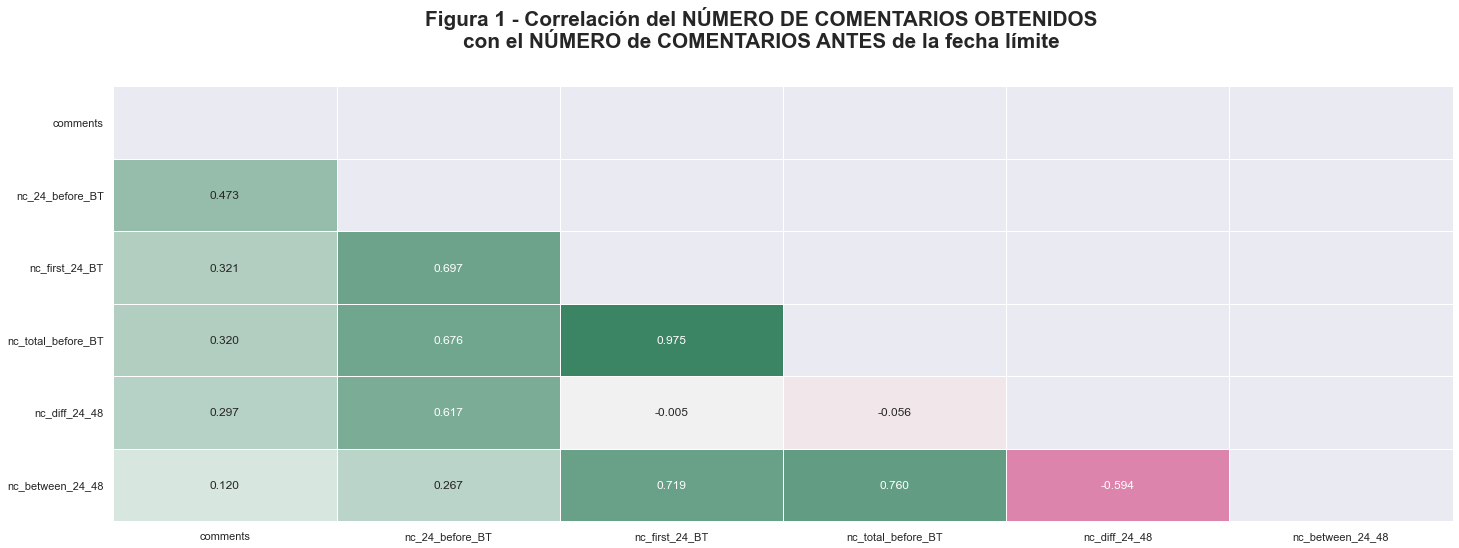

In [8]:

fig = set_figure(24, 8, 
                 suptitle='Figura 1' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el NÚMERO de COMENTARIOS ANTES de la fecha límite')
show_corr(data=data_train[features['nc'] + [target]], target=target)


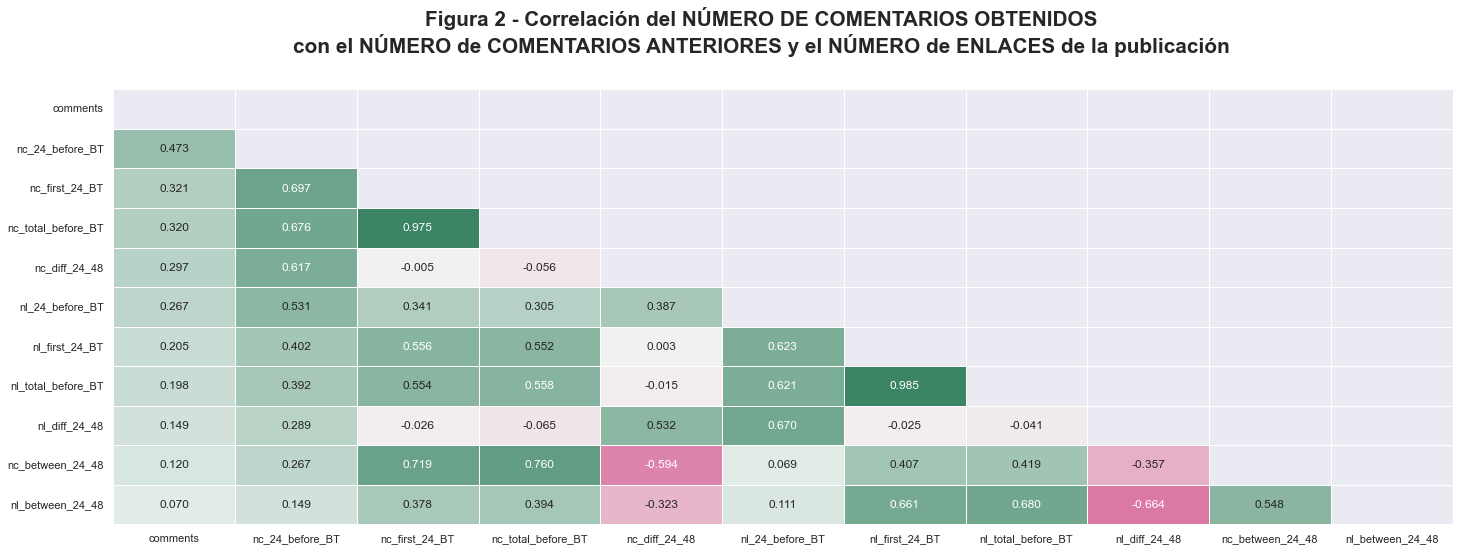

In [9]:

fig = set_figure(24, 8, 
                 suptitle='Figura 2' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el NÚMERO de COMENTARIOS ANTERIORES y el NÚMERO de ENLACES de la publicación')
show_corr(data=data_train[features['nc'] + features['nl'] + [target]], target=target)


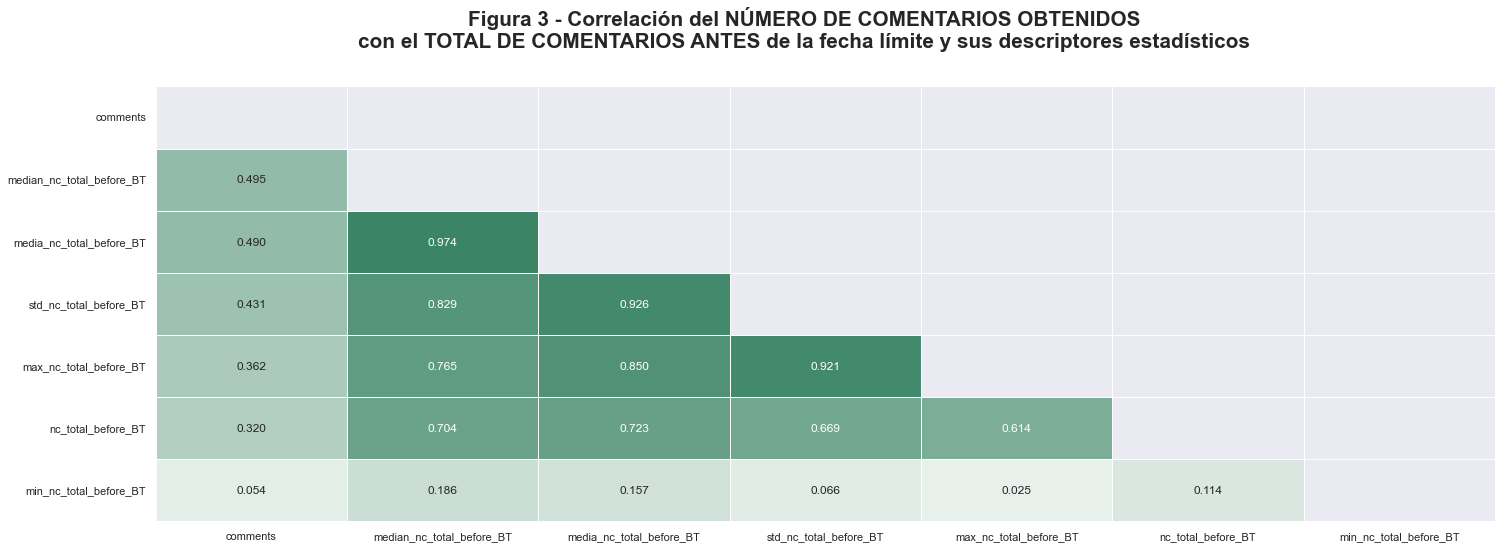

In [10]:

fig = set_figure(24, 8, 
                 suptitle='Figura 3' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el TOTAL DE COMENTARIOS ANTES de la fecha límite y sus descriptores estadísticos')
show_corr(data=data_train[features['nc_total_before_BT'] + features['sd_nc_total_before_BT'] + [target]], target=target)


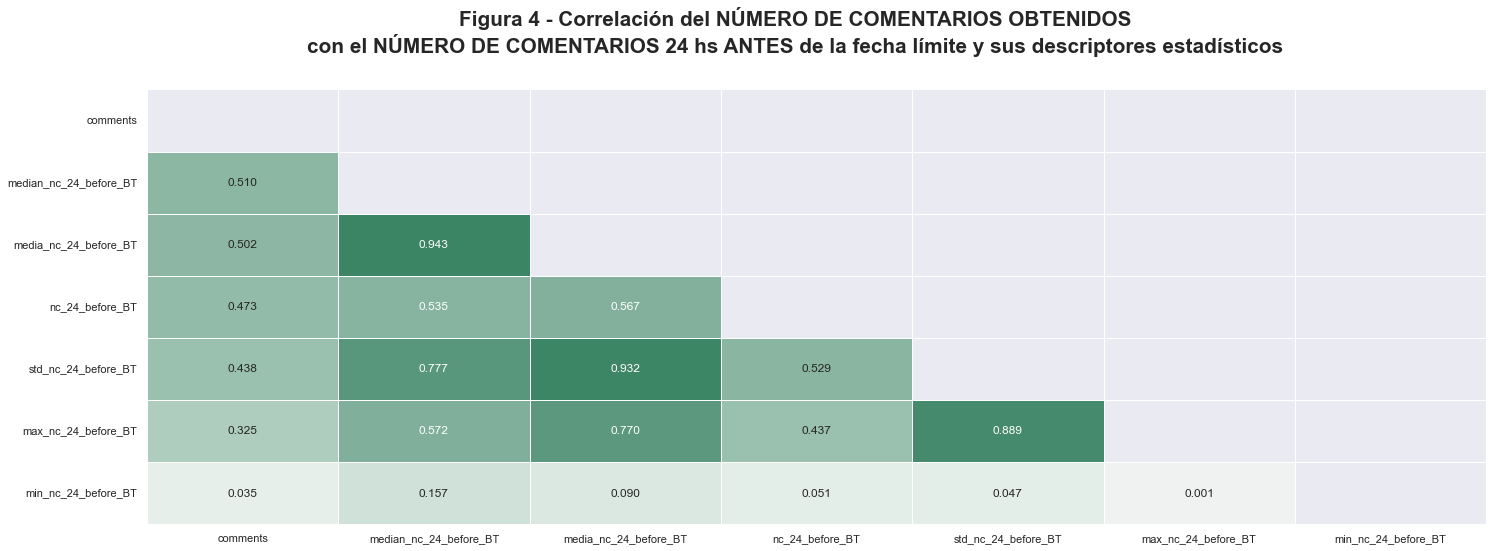

In [11]:

fig = set_figure(24, 8, 
                 suptitle='Figura 4' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el NÚMERO DE COMENTARIOS 24 hs ANTES de la fecha límite y sus descriptores estadísticos')
show_corr(data=data_train[features['nc_24_before_BT'] + features['sd_nc_24_before_BT'] + [target]], target=target)


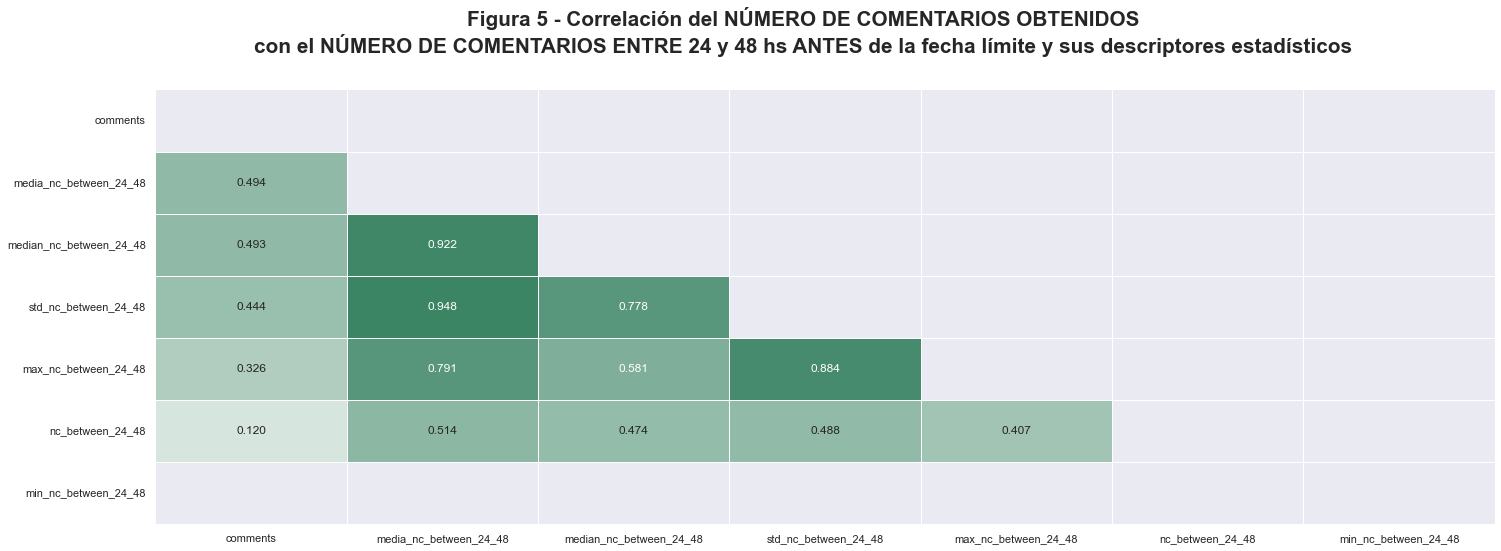

In [12]:

fig = set_figure(24, 8, 
                 suptitle='Figura 5' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el NÚMERO DE COMENTARIOS ENTRE 24 y 48 hs ANTES de la fecha límite y sus descriptores estadísticos')
show_corr(data=data_train[features['nc_between_24_48'] + features['sd_nc_between_24_48'] + [target]], target=target)


---
<a id="ExploratoryDataAnalysis_3_2"></a>
#### 3.2. Correlaciones con palabras frecuentes y días de publicación

- En **Figura 6** se observa que la correlación del número de comentarios obtenidos después de la fecha límite es muy baja en relación a las palabras más utilizadas en el texto de la publicación

- En **Figura 7** se observa que la correlación del número de comentarios obtenidos después de la fecha límite también es muy baja en relación a los días de la semana en que se hizo la publicación así como la fecha límite misma


<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

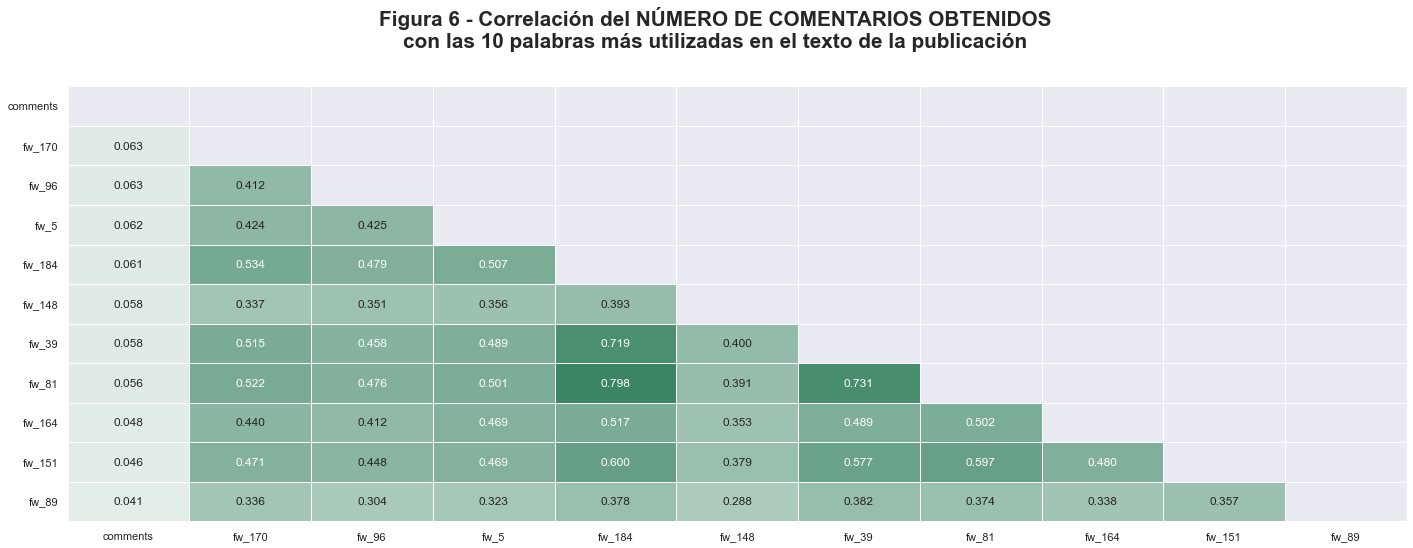

In [13]:

def get_frequent_word_counts_list(data) :
    u'''
    '''

    result = pd.DataFrame(columns=['count'], data=data.sum() )
    result.reset_index(drop=False, inplace=True)
    result.rename(columns={'index' : 'word'}, inplace=True)
    result.sort_values(by='count', ascending=False, inplace=True)
    
    return list(result['word'])


first_10_words = get_frequent_word_counts_list(data_train[features['frequent_word']])[:10]

fig = set_figure(24, 8, 
                 suptitle='Figura 6' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con las 10 palabras más utilizadas en el texto de la publicación')
show_corr(data=data_train[first_10_words + [target]], target=target)



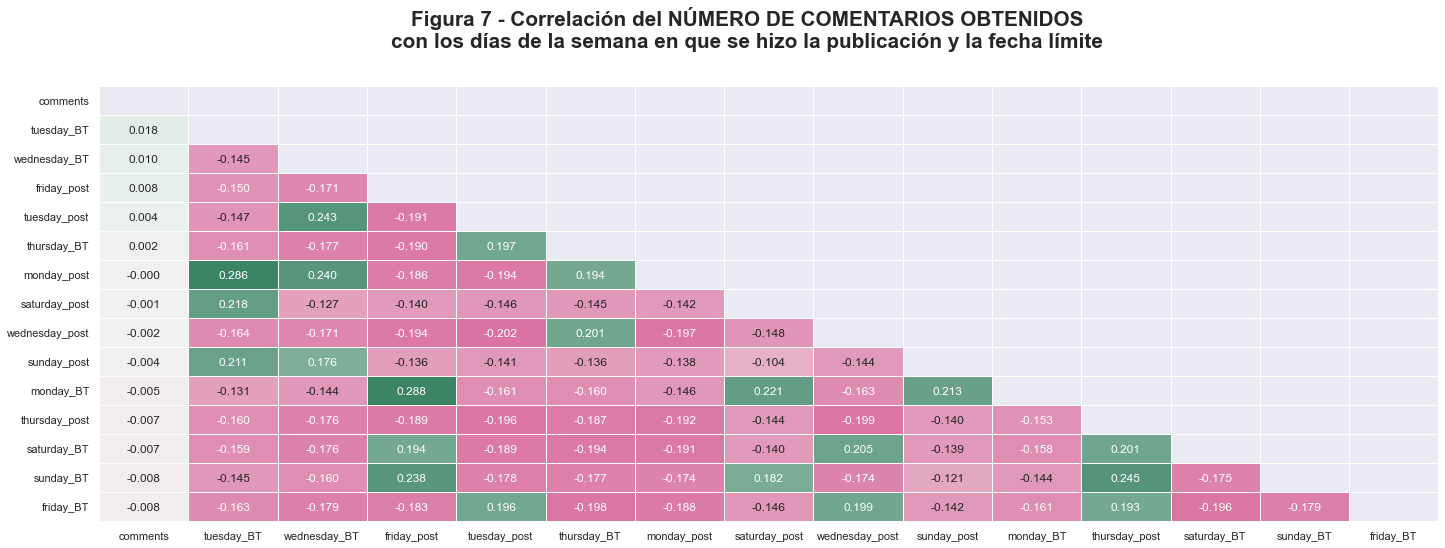

In [14]:

fig = set_figure(24, 8, 
                 suptitle='Figura 7' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con los días de la semana en que se hizo la publicación y la fecha límite')
show_corr(data=data_train[features['weekday_BT'] + features['weekday_post'] + [target]], target=target)


---
<a id="ExploratoryDataAnalysis_3_3"></a>
#### 3.3. Relación de la cantidad de comentarios obtenidos según conteo de publicaciones

- En **Figura 8** se aprecia que son pocas (menos del 4%) las publicaciones que obtienen un número de comentarios mayor o igual a 30

- En **Figura 9** se presenta la información sobre publicaciones que obtienen un número de comentarios menor a 30

<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

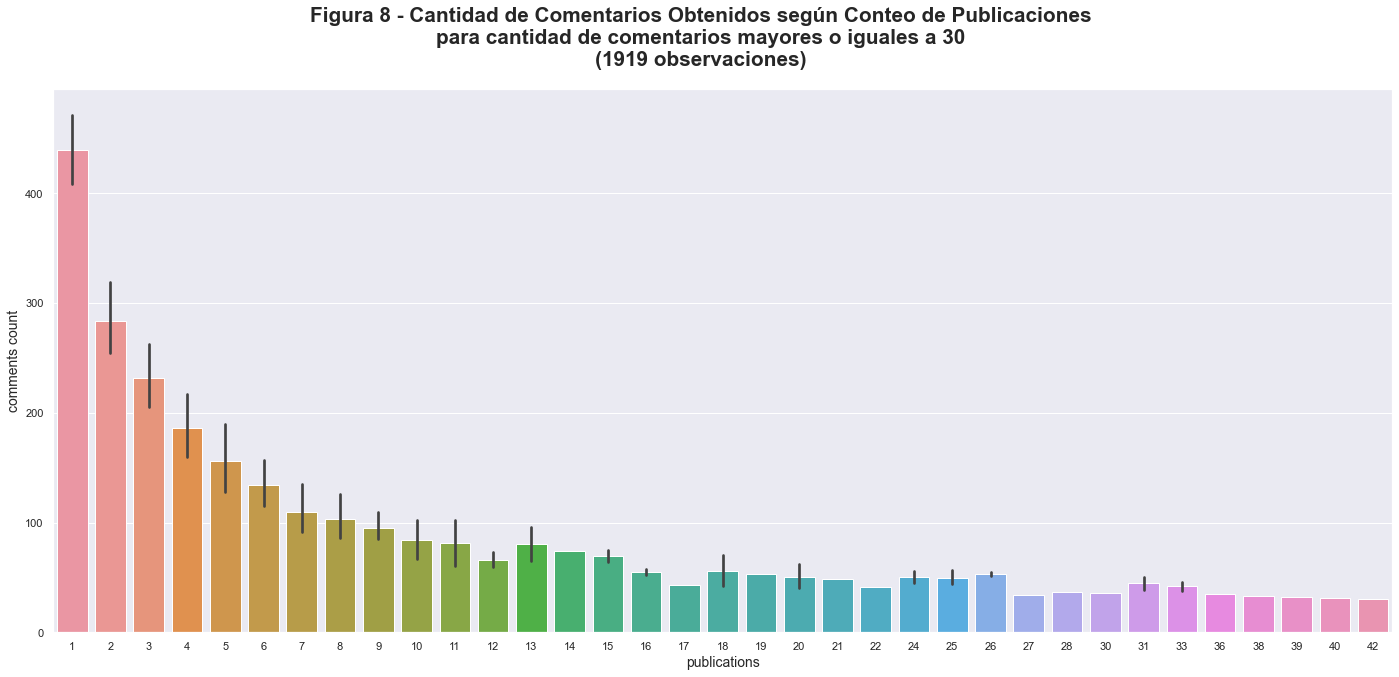

In [15]:
def get_obyc(data) :
    u'''
    '''
    temp1 = pd.DataFrame(data['comments'].value_counts())
    temp1.reset_index(inplace=True)
    temp1.columns = ['comments count', 'publications']
    temp1 = temp1.astype({'comments count':'int64'})
    return temp1

data_obyc = get_obyc(data_train)

set_figure(24, 10, 
           suptitle='Figura 8' + ' - ' + \
           'Cantidad de Comentarios Obtenidos según Conteo de Publicaciones' + '\n' + \
           'para cantidad de comentarios mayores o iguales a 30' + '\n' + \
           '(' + str(data_obyc[data_obyc['comments count']>=30]['publications'].sum()) + ' observaciones)', y=0.95)
sns.barplot(data=data_obyc[data_obyc['comments count']>=30], y='comments count', x='publications', orient='v');
    

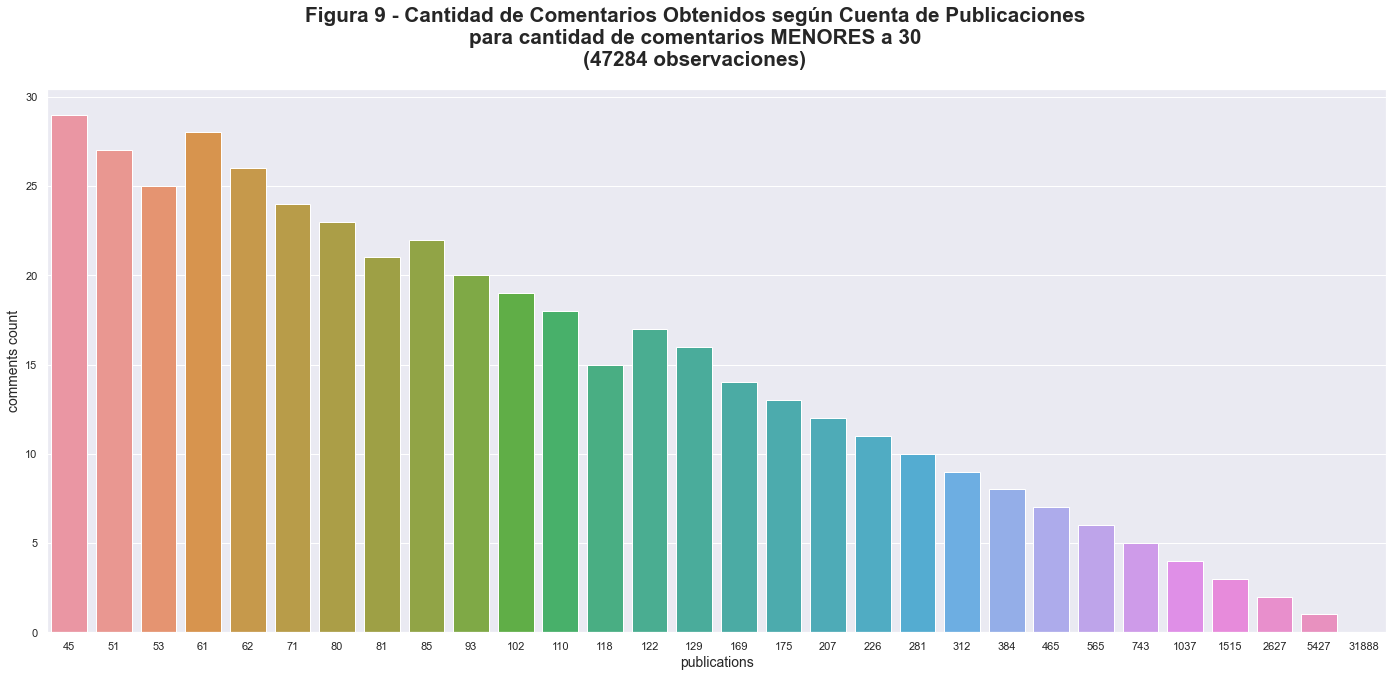

In [16]:
set_figure(24, 10, 
           suptitle='Figura 9' + ' - ' + \
           'Cantidad de Comentarios Obtenidos según Cuenta de Publicaciones' + '\n' + \
           'para cantidad de comentarios MENORES a 30' + '\n' + \
           '(' + str(data_obyc[data_obyc['comments count']<30]['publications'].sum()) + ' observaciones)', y=0.95)
sns.barplot(data=data_obyc[data_obyc['comments count']<30], y='comments count', x='publications', orient='v');

---

---

---
<a id="ProofOfConcept_3_4"></a>
### 3.4. Prueba de concepto para modelos de regresión

En la prueba de concepto para modelos de regresión con parámetros por defecto se observa que:

- Es posible predecir el número de comentarios a obtener en las próximas 24 horas con un **error de ± 25 comentarios**

- El *mejor tiempo* de entrenamiento es para el modelo XGBoost Regressor, sin embargo los parámetros por defecto presentan *un modelo sobreajustado*


<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

In [17]:
data_test = read_blogData_test()

In [18]:
X_train = data_train.iloc[:,0:280].copy()
y_train = data_train.iloc[:,-1].copy()

X_test = data_test.iloc[:,0:280].copy()
y_test = data_test.iloc[:,-1].copy()

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [19]:

def proof_of_concept() :
    u'''
    '''

    class POC_Model :
        def __init__(self, name, estimator) :
            self.name = name
            self.estimator = estimator
            return    

# ---

    models = []
    models.append( POC_Model(
        name='Linear Regression', 
        estimator=LinearRegression(
            n_jobs=-1, # use all processors
        ) 
    ) )

    models.append( POC_Model(
        name='Random Forest Regressor', 
        estimator=RandomForestRegressor(
            n_jobs=-1, # use all processors
        ) 
    ) )

    models.append( POC_Model(
        name='Gradient Boosting Regressor', 
        estimator=GradientBoostingRegressor() 
    ) )

    models.append( POC_Model(
        name='XGBoost Regressor', 
        estimator=xgb.XGBRegressor(
            n_jobs=-1, # use all processors
        ) 
    ) )

# ---

    poc_results = pd.DataFrame(columns=['model', 'fit time', 'train RMSE', 'test RMSE'])

    for m in models :
        print('Prueba de concepto para', m.name, '... ', end='')
        fit_time = time.time()
        m.estimator.fit(X_train, y_train)
        fit_time = ROUND(time.time() - fit_time)
        print(fit_time, 'segundos')

        y_train_pred = m.estimator.predict(X_train)
        train_rmse = ROUND(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        y_test_pred = m.estimator.predict(X_test)
        test_rmse = ROUND(np.sqrt(mean_squared_error(y_test, y_test_pred)))

        poc_results = poc_results.append(
            pd.Series(
                data=[m.name, 
                      fit_time, 
                      train_rmse, 
                      test_rmse
                     ], 
                index=poc_results.columns), 
            ignore_index=True
        )

    # pd.options.display.max_colwidth = 500 
    display(poc_results)
    return

# comment to hide proof of concept
# proof_of_concept()


Prueba de concepto para Linear Regression ... 0.4724 segundos
Prueba de concepto para Random Forest Regressor ... 41.0902 segundos
Prueba de concepto para Gradient Boosting Regressor ... 30.1983 segundos
Prueba de concepto para XGBoost Regressor ... 6.4025 segundos


,model,fit time,train RMSE,test RMSE
0,Linear Regression,0.4724,30.6107,26.3417
1,Random Forest Regressor,41.0902,10.3906,23.3203
2,Gradient Boosting Regressor,30.1983,21.5453,23.1799
3,XGBoost Regressor,6.4025,11.1912,24.0768


---
<a id="GridSearch_Evaluate_3_5"></a>
### 3.5. Evaluación de hiper parámetros

- Regularizar el modelo XGBoos es fundamental dado que los parámetros por defecto presentan sobreajuste (overfitting)

- En la documentación se encuentra que los parámetros: **reg_alpha**, **reg_lambda** y **subsample** permiten controlar el overfitting

<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---

In [13]:

def gridsearch_evaluate(X_train, y_train) :
    u'''
    '''

    class GS_Estimator :
        u'''
        '''

        def __init__(self, name, estimator, gs_param_grid=None) :
            self.name = name
            self.estimator = estimator
            self.gs_param_grid = gs_param_grid
            self.gs_estimator = None

            return        
# ---
    models = []

    models.append(
        GS_Estimator(
            name='XGBoost Regressor L1 y L2',
            estimator=xgb.XGBRegressor(),
            gs_param_grid={
                'eval_metric' : ['rmse'], # root mean square error
                'gamma' : [1], # (min_split_loss) minimum loss reduction
                'learning_rate' : [0.2], # (eta) step size shrinkage
                'max_depth' : [8], # maximum depth of tree
                'n_estimators' : [1000], 
                'n_jobs' : [-1], # use all processors
                'objective' : ['reg:squarederror'], # regression with squared loss
                'random_state' : [127], 
                'reg_alpha' : [1000], # L1 regularization
                'reg_lambda' : [1000], # L2 regularization
                'subsample' : [0.1], # prevents overfitting
            }
        )
    )
    
# ---

    gs_results = pd.DataFrame(columns=['model', 'best params', 'best score', 'train RMSE'])

    for m in models :
        scoring = 'neg_root_mean_squared_error'
        cv = StratifiedKFold(n_splits=2, random_state=11, shuffle=True)
        gs = GridSearchCV(
            estimator=m.estimator, # scikit-learn estimator interface
            param_grid=m.gs_param_grid, # dictionart key=parametrer, value=list of paraameter posible values
            scoring=scoring, # strategy to evaluate performance of cross-validated
            n_jobs=-2, # jobs in parallel -2 : all processors minus one
            refit=True, # refit estimator using best parameters
            cv=cv, # cross-validated splitting strategy
            return_train_score=False, # include training scores
            verbose=1 # display fold parameters, score, time, ...
        )
        
        print('Gridsearch para', m.name, '...')

        gs.fit(X_train, y_train)
        m.gs_estimator = gs.best_estimator_
        
        y_train_pred = gs.predict(X_train)
        gs_train_rmse = ROUND(np.sqrt(mean_squared_error(y_train, y_train_pred)))

        gs_results = gs_results.append(
            pd.Series(
                data=[m.name, 
                      gs.best_params_, 
                      gs.best_score_, 
                      gs_train_rmse
                     ], 
                index=gs_results.columns
                ),
            ignore_index=True
        )

    pd.options.display.max_colwidth = 500 
    display(gs_results.sort_values(by=['train RMSE'], axis='index'))
    
    return

# comment to gridsearh evaluate
# gridsearch_evaluate(X_train, y_train)


Gridsearch para XGBoost Regressor L1 y L2 ...
Fitting 2 folds for each of 1 candidates, totalling 2 fits


,model,best params,best score,train RMSE
0,XGBoost Regressor L1 y L2,"{'eval_metric': 'rmse', 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 1000, 'n_jobs': -1, 'objective': 'reg:squarederror', 'random_state': 127, 'reg_alpha': 1000, 'reg_lambda': 1000, 'subsample': 0.1}",-26.849064,23.4191


---

---



---
